In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn import preprocessing 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [6]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [7]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
df.dropna(inplace=True)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [10]:
df.drop('ZIP Code',axis=1,inplace=True)
df

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,3,0.5,2,0,0,0,0,1,0


In [11]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [12]:
df.describe()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [13]:
df['Experience'] = df['Experience'].abs()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


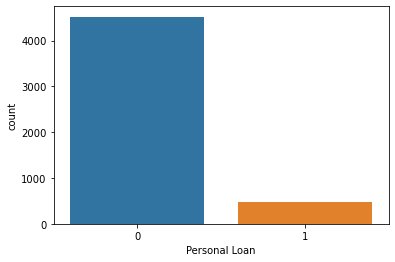

In [16]:
sns.countplot(df['Personal Loan'])
#the data set is skewed in terms of target column.
#There are far few records in class 1 i.e. people who took the personal loan last time.

In [17]:
def get_ct(df,var):
    ct_res=pd.crosstab(df[var],df['Personal Loan'],margins=True)
    ct_res['Approved(%)']=round(ct_res[1]/ct_res['All']*100,2)
    return ct_res.drop(columns='All')

In [18]:
get_ct(df,'CreditCard')

Personal Loan,0,1,Approved(%)
CreditCard,,,
0,3193,337,9.55
1,1327,143,9.73
All,4520,480,9.60


In [19]:
get_ct(df,'Online')

Personal Loan,0,1,Approved(%)
Online,,,
0,1827,189,9.38
1,2693,291,9.75
All,4520,480,9.60


In [20]:
get_ct(df,'Education')

Personal Loan,0,1,Approved(%)
Education,,,
1,2003,93,4.44
2,1221,182,12.97
3,1296,205,13.66
All,4520,480,9.60


In [21]:
get_ct(df,'Family')

Personal Loan,0,1,Approved(%)
Family,,,
1,1365,107,7.27
2,1190,106,8.18
3,877,133,13.17
4,1088,134,10.97
All,4520,480,9.60


In [22]:
get_ct(df,'CD Account')

Personal Loan,0,1,Approved(%)
CD Account,,,
0,4358,340,7.24
1,162,140,46.36
All,4520,480,9.60


In [23]:
def get_stra_ct(df,stra_var,var):
    ct_res=pd.crosstab(index=[df[stra_var],df[var]], columns=df['Personal Loan'],margins=True)
    ct_res['Approved(%)']=round(ct_res[1]/ct_res['All']*100,2)
    return ct_res.drop(columns='All').drop('All',level=0)
get_stra_ct(df,'Online','Family')

Personal Loan    0   1  Approved(%)
Online Family                      
0      1       550  39         6.62
       2       506  42         7.66
       3       348  51        12.78
       4       423  57        11.88
1      1       815  68         7.70
       2       684  64         8.56
       3       529  82        13.42
       4       665  77        10.38

In [24]:
get_stra_ct(df,'CreditCard', 'Education')

Personal Loan            0    1  Approved(%)
CreditCard Education                        
0          1          1402   61         4.17
           2           873  130        12.96
           3           918  146        13.72
1          1           601   32         5.06
           2           348   52        13.00
           3           378   59        13.50

In [25]:
# Column descriptions

##	Data Description:								
##									
##	ID	Customer ID							
##	Age	Customer's age in completed years							
##	Experience	#years of professional experience							
##	Income	Annual income of the customer ($000)							
##	ZIPCode	Home Address ZIP code.							
##	Family	Family size of the customer							
##	CCAvg	Avg. spending on credit cards per month ($000)							
##	Education	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional							
##	Mortgage	Value of house mortgage if any. ($000)							
##	Personal Loan	Did this customer accept the personal loan offered in the last campaign?							
##	Securities Account	Does the customer have a securities account with the bank?							
##	CD Account	Does the customer have a certificate of deposit (CD) account with the bank?							
##	Online	Does the customer use internet banking facilities?							
##	CreditCard	Does the customer use a credit card issued by UniversalBank?							


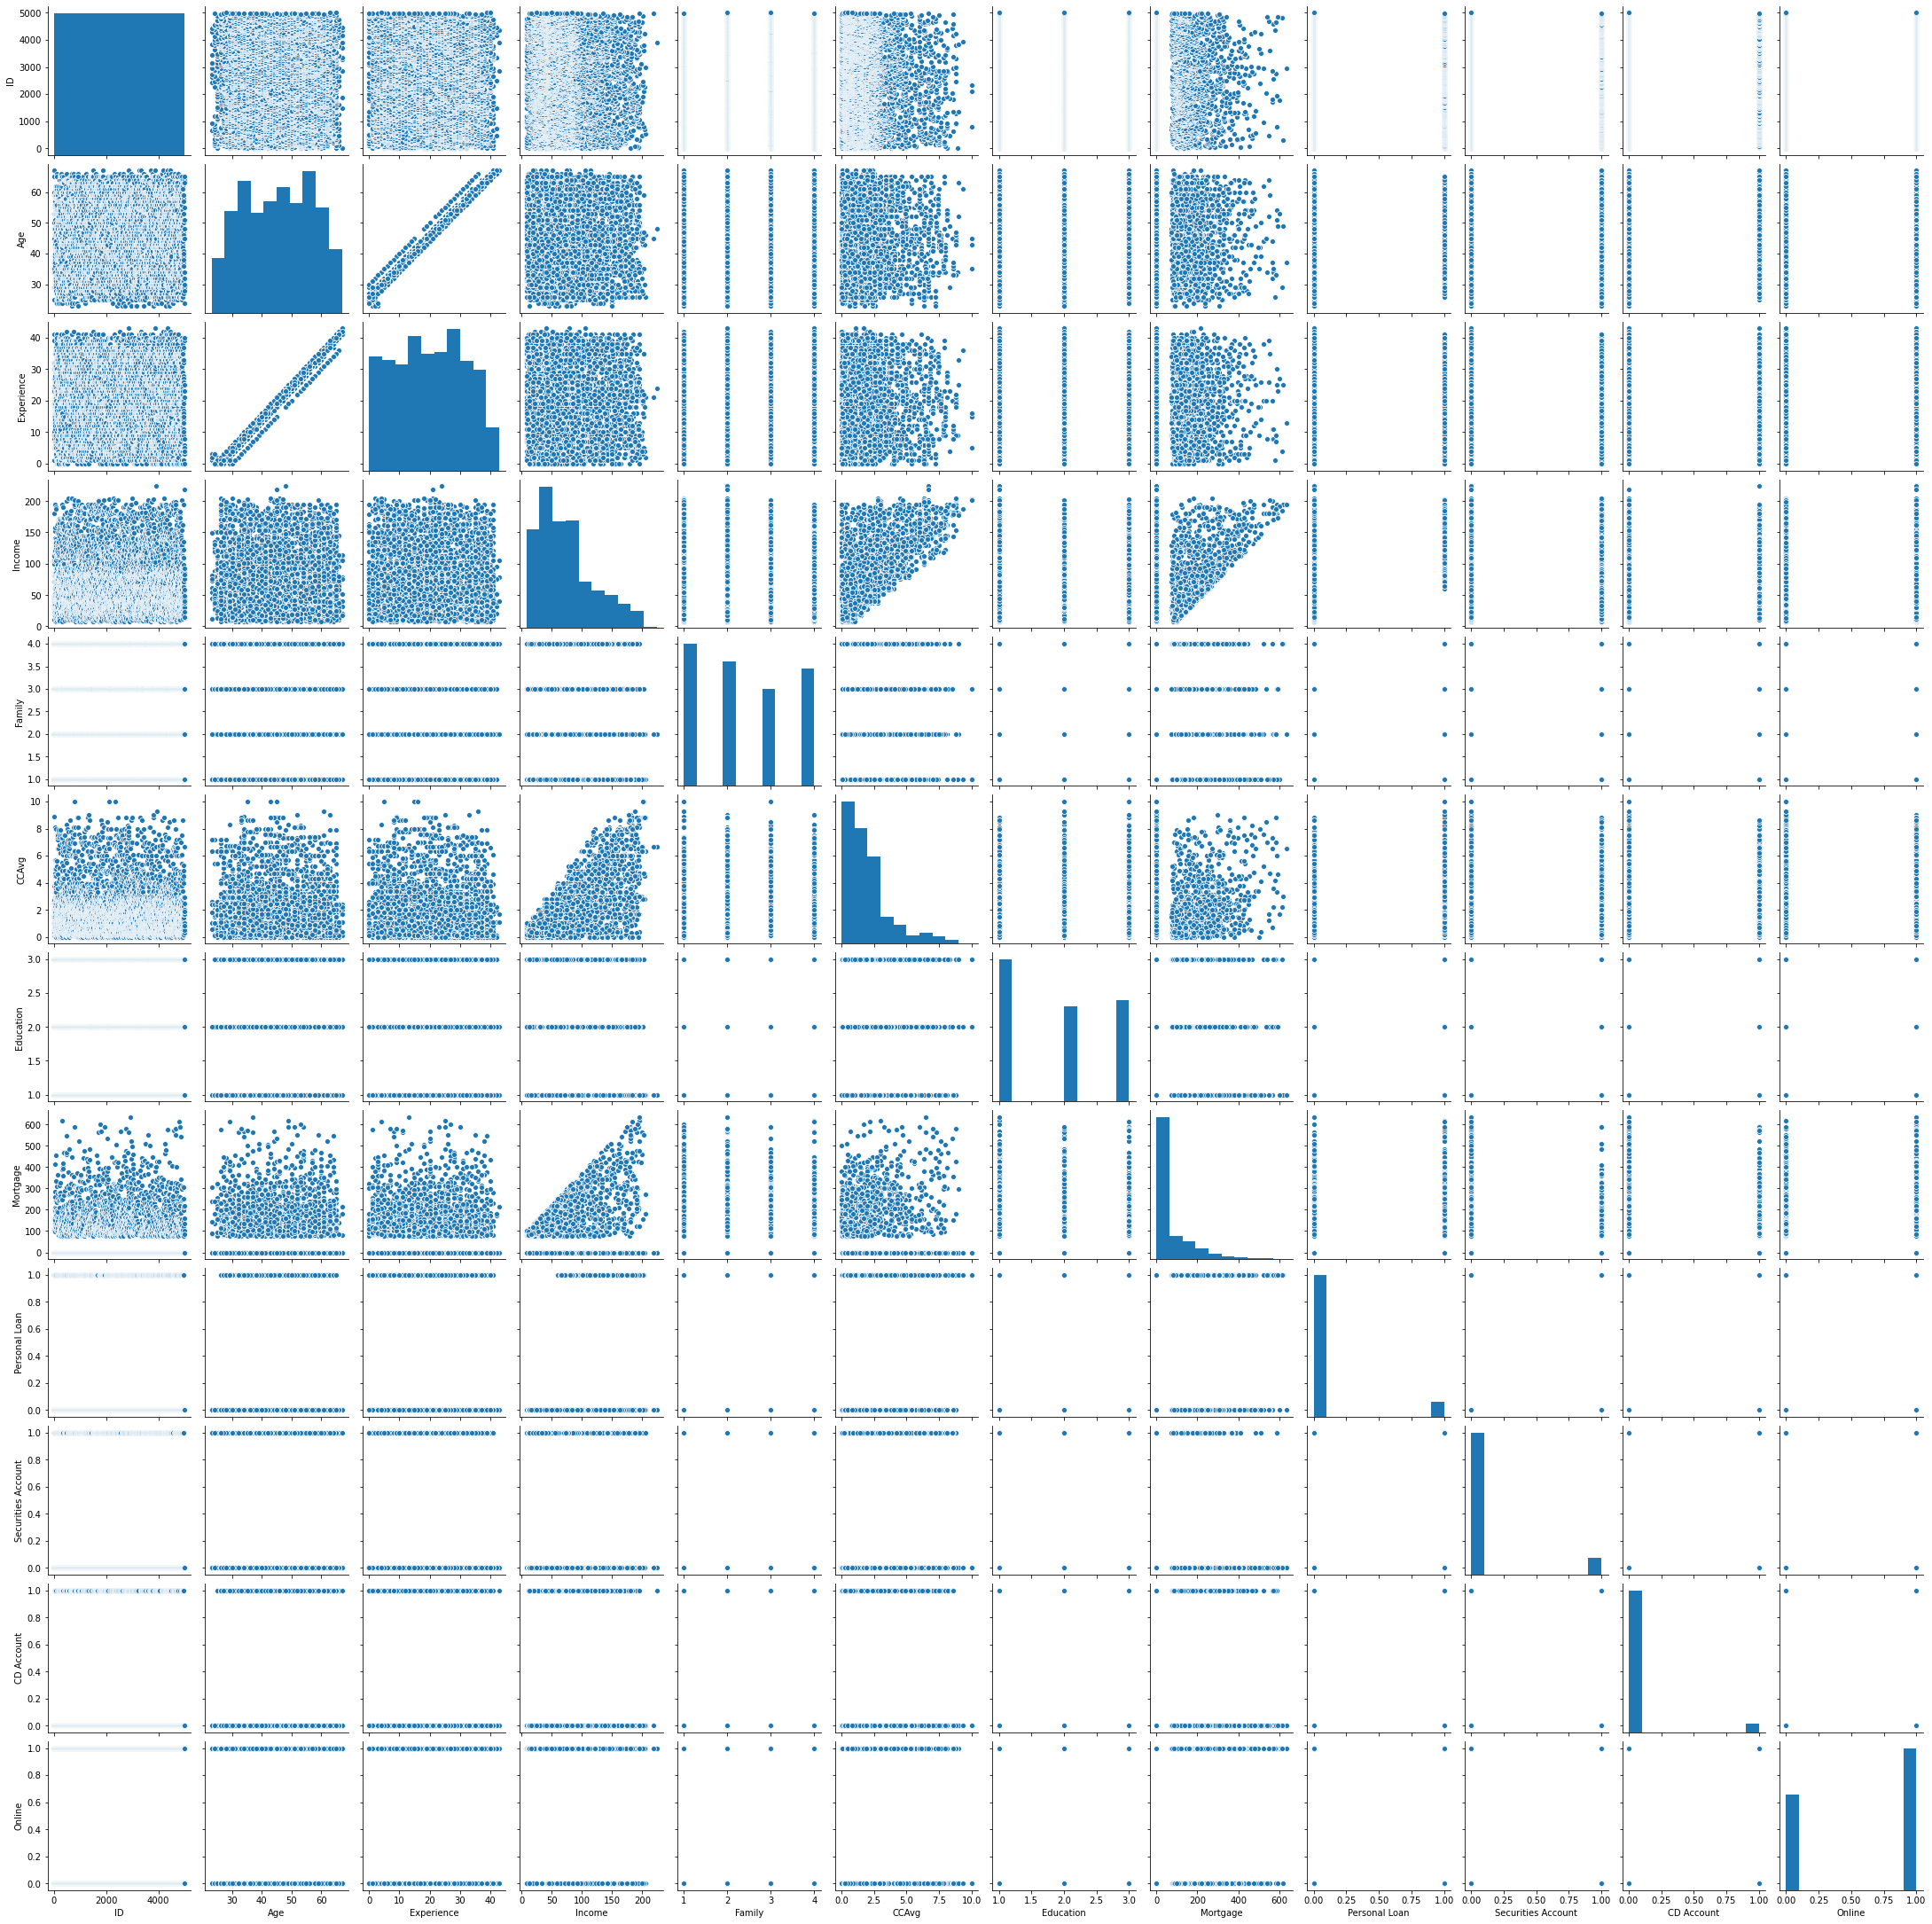

In [26]:
df_attr = df.iloc[:,0:12] #compare all attributes visually to check for relationships that can be exploited

sns.pairplot(df_attr)

In [27]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [28]:
df.groupby(["Personal Loan"]).count()  #The data set is skewed in terms of target column.
# There are far few records in class 1 i.e. people who took the personal loan last time. But that 
# is the class of interst to us! We have to identify potential customers and do not want any potential
# customer to be missed.

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480


In [29]:
# Separate the independent attributes i.e. columns 0 to 8 and store them in X array
# Store the target column (column 8) into Y array

X_df = df.loc[:, df.columns != 'Personal Loan']
y_df = df.loc[:, df.columns == 'Personal Loan']


In [30]:
X_df

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,1,1.9,3,0,0,0,1,0
4996,4997,30,4,15,4,0.4,1,85,0,0,1,0
4997,4998,63,39,24,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,3,0.5,2,0,0,0,1,0


In [31]:
x_train, x_test, y_train, y_test=model_selection.train_test_split(X_df,y_df,test_size=0.30)
import statsmodels.api as sm
logit=sm.Logit(y_train,sm.add_constant(x_train))
lg=logit.fit()

#summary of logistic regression
from scipy import stats
stats.chisqprob=lambda chisq, df:stats.chi2.sf(chisq,df)
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.132447
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           12
Date:                Thu, 19 Nov 2020   Pseudo R-squ.:                  0.5886
Time:                        22:55:51   Log-Likelihood:                -463.57
converged:                       True   LL-Null:                       -1126.8
Covariance Type:            nonrobust   LLR p-value:                1.021e-276
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.4276      1.918     -7.001      0.000     -17.187      -9.668
ID   

In [32]:
####### --------------------------- Logistic Model --------------------------------------

In [33]:
# Create the training and test data set in the ratio of 70:30 respectively. Can be any other ratio...
# Prepare data for logistic regression

features=X_df.iloc[:, 0:10]
features_array = features.values   #logistic modeling algorithm requires feature array not dataframe
target_labels = y_df.values


test_size = 0.40 # taking 60:40 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code when using random functions to 
# generate the training and test data

X_train, X_test, y_train, y_test = model_selection.train_test_split(features_array, target_labels, test_size=test_size, random_state=seed)


In [34]:
y_train = np.ravel(y_train)   # to convert 1 d vector into 1 d array
y_test = np.ravel(y_test)   # to convert 1 d vector into 1 d array

In [35]:
# Let us first try logistic regression to predict the personal loan affinity - 
# We removed the binned columns for this (considered only 11 columns 1:10) which are numeric

log_model = LogisticRegression(solver='lbfgs')
log_model.fit(X_train, y_train)
model_score = log_model.score(X_test, y_test)
y_predict = log_model.predict(X_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))


0.9345
[[1764   52]
 [  79  105]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# The accuracy score of .954 looks impressive but do not forget, it is unreliable as it is a score at
# model level. Let us look at class level, especially the class 1.

# summarize the fit of the model
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1816
           1       0.67      0.57      0.62       184

    accuracy                           0.93      2000
   macro avg       0.81      0.77      0.79      2000
weighted avg       0.93      0.93      0.93      2000



In [37]:
#The precision and recall for class 1 is low...

#Precision: Within a given set of positively-labeled results, the fraction that were 
#true positives = tp/(tp + fp) , this has to be calculated for each class i.e. 0 and 1 and should be
# high for the class less represented, class 1 in our example

#Recall: Given a set of positively-labeled results, the fraction of all positives that were 
#retrieved = tp/(tp + fn)

# Accuracy: tp + tn / (tp + tn + fp +fn) But this measure can be dominated by larger class. 
# Suppose 10, 90 and 80 of 90 is correctly predicted while only 2 of 0 is predicted correctly. 
# Accuracy is 80+2 / 100 i.e. 82%

# F is harmonic mean of precision and recal given by ((B^2 +1) PR) / (B^2P +R)
#When B is set to 1 we get F1 = 2PR / (P+R)

In [38]:
###### ----------------------- Naive Bayes Model ---------------------------------

In [39]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

predictions=nb_model.predict(X_test)

#Assess the accuracy of the model on test data
print(metrics.confusion_matrix(y_test,predictions))


[[1654  162]
 [  81  103]]


In [40]:
# make predictions
expected = y_test
predicted = nb_model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1816
           1       0.39      0.56      0.46       184

    accuracy                           0.88      2000
   macro avg       0.67      0.74      0.70      2000
weighted avg       0.90      0.88      0.89      2000



In [41]:
## Naive Bayes also is not giving the class 1 metrics in the acceptal range (80% and above). Let us try
## K Nearest Neighbours

In [42]:
#####  ------------------------------ K Nearest Neighbours ------------------------------------

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [44]:
predicted_labels = knn_model.predict(X_test)

In [45]:
print(metrics.confusion_matrix(y_test, predicted_labels))

[[1730   86]
 [ 136   48]]


In [46]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1816
           1       0.36      0.26      0.30       184

    accuracy                           0.89      2000
   macro avg       0.64      0.61      0.62      2000
weighted avg       0.87      0.89      0.88      2000



In [48]:


plt.figure()
logit_roc_auc=roc_auc_score(y_test,log_model.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,log_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label='Logistic Regression(area=%0.2f)'% logit_roc_auc)


nb_roc_auc=roc_auc_score(y_test,nb_model.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,nb_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label='Naive Bayes(area=%0.2f)'% nb_roc_auc)

knn_roc_auc=roc_auc_score(y_test,knn_model.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,knn_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label='knn (area=%0.2f)'% knn_roc_auc)

plt.plot([0,1],[0,1],'r--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
#plt.savefig('ROC')
plt.show()

TypeError: 'module' object is not callable

In [49]:
### let us check the effect of scaling (convert all dimensions to z scores)
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [50]:
predicted_labels =knn_model.predict(X_test_scaled)

In [51]:
print(metrics.confusion_matrix(y_test, predicted_labels))

[[1795   21]
 [  66  118]]


In [52]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1816
           1       0.85      0.64      0.73       184

    accuracy                           0.96      2000
   macro avg       0.91      0.81      0.85      2000
weighted avg       0.95      0.96      0.95      2000



In [53]:
## scaled KNN algorithm gives the best result for class 1 till now. Let us check decision tree

In [54]:
plt.figure()
logit_roc_auc=roc_auc_score(y_test,log_model.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,log_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label='Logistic Regression(area=%0.2f)'% logit_roc_auc)


nb_roc_auc=roc_auc_score(y_test,nb_model.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,nb_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label='Naive Bayes(area=%0.2f)'% nb_roc_auc)

knn_roc_auc=roc_auc_score(y_test,knn_model.predict(X_test_scaled))
fpr,tpr,thresholds=roc_curve(y_test,knn_model.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr,tpr,label='knn (area=%0.2f)'% knn_roc_auc)

plt.plot([0,1],[0,1],'r--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
#plt.savefig('ROC')
plt.show()

TypeError: 'module' object is not callable